# Flight Price Prediction Project

# Problem Statement:


    
Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.



Size of training set: 10683 records
    

Size of test set: 2671 records

# FEATURES:


Airline: The name of the airline.
    

    
Date_of_Journey: The date of the journey
    

    
Source: The source from which the service begins.
    
    
    
Destination: The destination where the service ends.
    

    
    
Route: The route taken by the flight to reach the destination.

    
    
Dep_Time: The time when the journey starts from the source.

    
    
Arrival_Time: Time of arrival at the destination.

    
    
Duration: Total duration of the flight.

    
    
Total_Stops: Total stops between the source and destination.

    
    
Additional_Info: Additional information about the flight

    
    
Price: The price of the ticket

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import io
import requests
import seaborn as sns
import seaborn as sb
from matplotlib import pyplot as plt
from scipy.stats import zscore
from sklearn.svm import SVR
from math import floor
import pickle
import os
import joblib
import plotly.express as px
from  sklearn.decomposition import PCA
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import power_transform
from pandas.api.types import CategoricalDtype
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.pipeline import FeatureUnion
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
%matplotlib inline
pd.set_option('display.max_columns',None)

pd. set_option('display.max_columns', 300) # or 1000.
pd. set_option('display.max_rows', 300) # or 1000.

# Load Data

In [2]:
# read an excel file and convert
# into a dataframe object
main_train=pd.DataFrame(pd.read_excel("main_train.xlsx"))

# show the dataframe
main_train

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


# Steps TO DO:


01. Understanding the problem


02. Data Reading


03. Removing the datapoints where the target value is null


04. Preprocess the data


05. Train , validation and test split


06. EDA


07. Feature Engineering


08. Feture Selection


09. Modelling


10. HPT


11. Accuracy

Remember --Models only understand numbers

In [4]:
main_train

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [5]:
main_train.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

Price is the target column

In [6]:
main_test=pd.DataFrame(pd.read_excel("main_test.xlsx"))

# show the dataframe
main_test

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


# Removing the datapoints where the target value is null

In [9]:
#Preprocess the data 
main_train.shape

(10683, 11)

In [10]:
main_train.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

# Preprocessing


# Null Imputation

In [11]:
# Concepts to learn : MAR , MCAR ,MNAR
main_train[main_train.Route.isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


Dropping the record contating null value as the Route is MCAR and Total stops is related + single row so doesnot matter much

In [12]:
main_train = main_train[main_train.Route.isnull()==False]

In [13]:
main_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1001.4+ KB


# Date Time Conversion

In [14]:
main_train['Date_of_Journey'] = pd.to_datetime(main_train['Date_of_Journey'])

# Constant / Duplicate removal

In [15]:
main_train.cov()

,Price
Price,2.126638e+07


In [16]:
##HERE WILL NOT WORK !!!!! --> need integer/float only dataframe
# from sklearn.feature_selection import VarianceThreshold
# sel = VarianceThreshold(0.8)
# sel.fit(main_train)
#other ways to check for variance --> nunique , value_counts

main_train.nunique()

Airline              12
Date_of_Journey      40
Source                5
Destination           6
Route               128
Dep_Time            222
Arrival_Time       1343
Duration            368
Total_Stops           5
Additional_Info      10
Price              1870
dtype: int64

In [17]:
# For catagorical columns with relatively low unique value (<= 12) -- looking for value_counts
# if unique count ==1 , constant column 

for col in main_train.columns:
    if main_train[col].nunique()<= 12:
        print(main_train[col].value_counts())
        print('#########################')

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64
#########################
Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64
#########################
Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64
#########################
1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64
#####################

In [18]:
# clubbing Airlines with low occurance in dataset - to ensure model gets max information
main_train['Airline'] = np.where(main_train['Airline'].isin(["Multiple carriers Premium economy",
                                                             "Jet Airways Business",
                                                             "Vistara Premium economy",
                                                             "Trujet"]),"Other Airlines",main_train['Airline'])

In [19]:
#sort values by data as the price is dependent on the jourrney date 
# we only use past data to train the model , hence sorting ensures that while splittig the data only past data is there on the train set

main_train.sort_values(by=['Date_of_Journey'])

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
3835,SpiceJet,2019-01-03,Kolkata,Banglore,CCU → BLR,09:00,11:30,2h 30m,non-stop,No info,5515
7356,Multiple carriers,2019-01-03,Delhi,Cochin,DEL → BOM → COK,00:20,13:20,13h,1 stop,No info,29528
486,Jet Airways,2019-01-03,Banglore,New Delhi,BLR → BOM → DEL,08:55,15:15,6h 20m,1 stop,No info,26890
3545,Air India,2019-01-03,Banglore,New Delhi,BLR → BOM → IDR → DEL,08:50,11:10 02 Mar,26h 20m,2 stops,No info,19372
3543,IndiGo,2019-01-03,Banglore,New Delhi,BLR → DEL,10:05,13:00,2h 55m,non-stop,No info,10067
...,...,...,...,...,...,...,...,...,...,...,...
4046,Multiple carriers,2019-12-06,Delhi,Cochin,DEL → BOM → COK,09:00,19:15,10h 15m,1 stop,No info,14848
4038,Jet Airways,2019-12-06,Kolkata,Banglore,CCU → BOM → BLR,20:00,04:40 13 Jun,8h 40m,1 stop,No info,12576
4030,Jet Airways,2019-12-06,Delhi,Cochin,DEL → ATQ → BOM → COK,18:20,19:00 13 Jun,24h 40m,2 stops,No info,14300
4271,Jet Airways,2019-12-06,Delhi,Cochin,DEL → ATQ → BOM → COK,08:10,04:25 13 Jun,20h 15m,2 stops,No info,14300


# Split Data

In [20]:
# Converting the main_train into X and y so that we can pass it onto train_test_split function

# X --> contains the dataframe without the target i.e price
X = main_train.drop('Price',axis=1)

# y --> contains only the target value 
y = main_train['Price']

In [21]:
#splitting the data first into two part -- doing a 70:30 split i.e 30% data fed to intermediate test data set
from sklearn.model_selection import train_test_split
X_train,X_inter_test,y_train,y_inter_test = train_test_split(X,y,test_size=0.3,random_state=0 , shuffle = False)

In [22]:
X_val,X_test,y_val,y_test = train_test_split(X_inter_test,y_inter_test,test_size=0.5,random_state=0 , shuffle = False)

In [23]:
X_train.shape , X_val.shape , X_test.shape

((7477, 10), (1602, 10), (1603, 10))

# EXPLORATARY DATA ANALYSIS

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

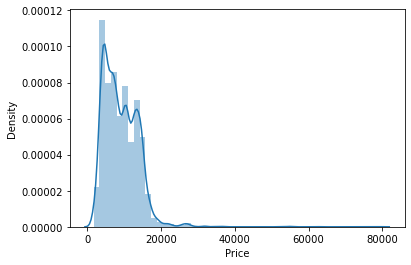

In [24]:
# distribution of the target column 
# right skewed distribution
# outliers present but not that significant , hence  
sns.distplot(y_train)

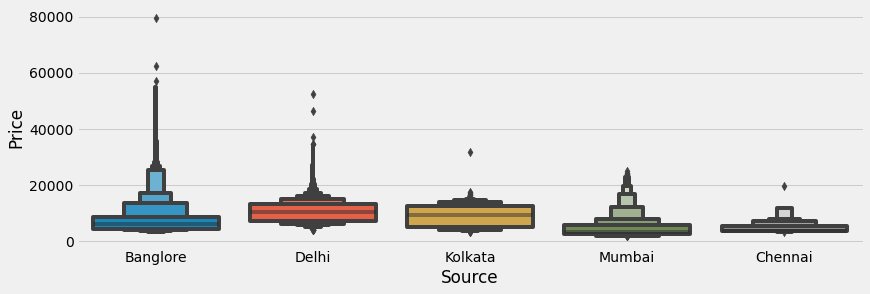

In [30]:
sns.catplot(y = "Price", x = "Source", data = main_train.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

In [26]:
X_train.merge(y_train,on = X_train.index)

,key_0,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...,...
7472,7472,Air India,2019-06-03,Delhi,Cochin,DEL → BOM → COK,10:00,19:15,9h 15m,1 stop,No info,16439
7473,7473,Jet Airways,2019-05-21,Kolkata,Banglore,CCU → BOM → BLR,14:05,22:35,8h 30m,1 stop,No info,14781
7474,7474,Jet Airways,2019-03-06,Delhi,Cochin,DEL → BOM → COK,19:45,12:35 04 Jun,16h 50m,1 stop,In-flight meal not included,10262
7475,7475,Jet Airways,2019-05-24,Kolkata,Banglore,CCU → BOM → BLR,14:05,18:15 25 May,28h 10m,1 stop,In-flight meal not included,10844


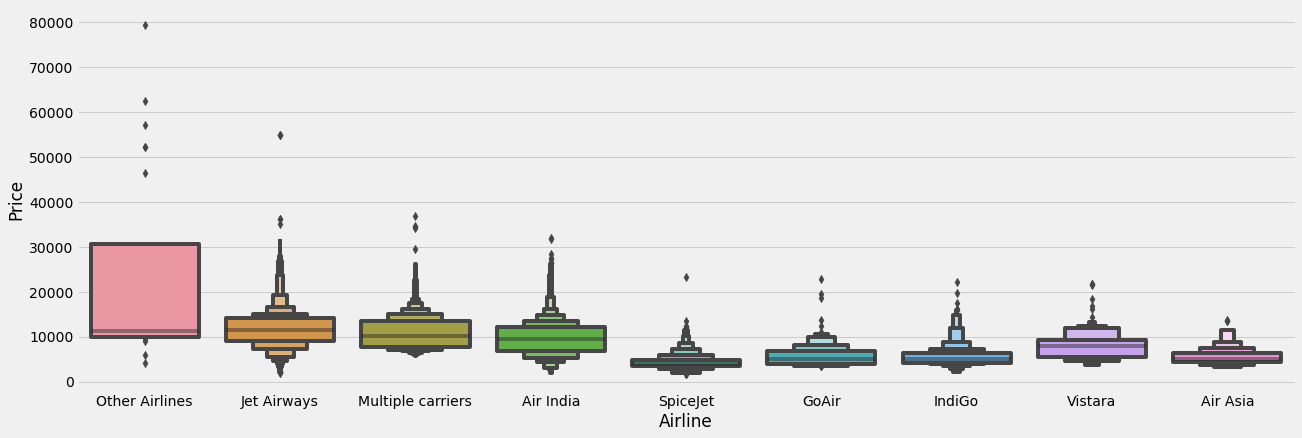

In [31]:
sns.catplot(y = "Price", x = "Airline", data = main_train.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

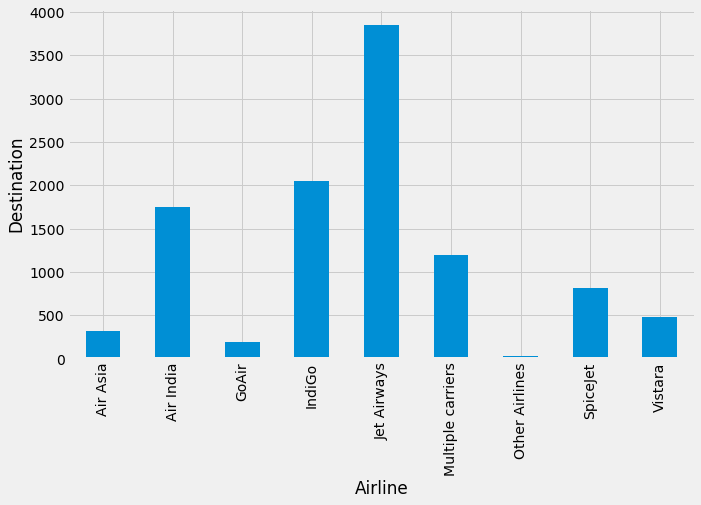

In [33]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax = main_train.groupby('Airline').Destination.count().plot.bar(ylim=0)
ax.set_ylabel('Destination')
plt.show()

<AxesSubplot:xlabel='Price', ylabel='Duration'>

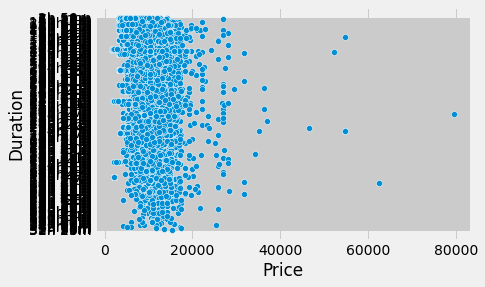

In [34]:
#No direct trend
sns.scatterplot(data=X_train.merge(y_train,on = X_train.index), x="Price", y="Duration")

In [35]:
X_train.Route.nunique()

122

In [36]:
# cheapest / costliest --> flights per route 
# flights which provides services to most of the routes   
X_train.merge(y_train,on = X_train.index).groupby(['Route','Airline'])['Price'].agg(['min']).unstack().T.idxmin()

Route
BLR → AMD → DEL                          (min, Vistara)
BLR → BBI → DEL                        (min, Air India)
BLR → BDQ → DEL                      (min, Jet Airways)
BLR → BOM → AMD → DEL                  (min, Air India)
BLR → BOM → BHO → DEL                  (min, Air India)
BLR → BOM → DEL                           (min, IndiGo)
BLR → BOM → IDR → DEL                  (min, Air India)
BLR → BOM → IDR → GWL → DEL            (min, Air India)
BLR → BOM → JDH → DEL                (min, Jet Airways)
BLR → BOM → NAG → DEL                  (min, Air India)
BLR → BOM → UDR → DEL                  (min, Air India)
BLR → CCU → BBI → DEL                  (min, Air India)
BLR → CCU → BBI → HYD → DEL            (min, Air India)
BLR → CCU → DEL                        (min, Air India)
BLR → CCU → GAU → DEL                  (min, Air India)
BLR → COK → DEL                        (min, Air India)
BLR → DEL                               (min, SpiceJet)
BLR → GAU → DEL                        (mi

In [37]:
X_train.merge(y_train , on = X_train.index).groupby(['Total_Stops','Airline'])['Price'].agg(['min']).unstack().T.idxmin()

Total_Stops
1 stop         (min, IndiGo)
2 stops     (min, Air India)
3 stops     (min, Air India)
non-stop     (min, SpiceJet)
dtype: object

# Feature Engineering

In [38]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7477 entries, 0 to 7476
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          7477 non-null   object        
 1   Date_of_Journey  7477 non-null   datetime64[ns]
 2   Source           7477 non-null   object        
 3   Destination      7477 non-null   object        
 4   Route            7477 non-null   object        
 5   Dep_Time         7477 non-null   object        
 6   Arrival_Time     7477 non-null   object        
 7   Duration         7477 non-null   object        
 8   Total_Stops      7477 non-null   object        
 9   Additional_Info  7477 non-null   object        
dtypes: datetime64[ns](1), object(9)
memory usage: 642.6+ KB


In [39]:
from sklearn.preprocessing import LabelEncoder
Airline_encoder = LabelEncoder()
Airline_encoder.fit(X_train['Airline'])
X_train['Airline_enc'] = Airline_encoder.transform(X_train['Airline'])

<ipython-input-39-3a139e463d28>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Airline_enc'] = Airline_encoder.transform(X_train['Airline'])


In [40]:
X_train[['Airline_enc','Airline']]

,Airline_enc,Airline
0,3,IndiGo
1,1,Air India
2,4,Jet Airways
3,3,IndiGo
4,3,IndiGo
...,...,...
7472,1,Air India
7473,4,Jet Airways
7474,4,Jet Airways
7475,4,Jet Airways


In [41]:
X_val['Airline_enc'] = Airline_encoder.transform(X_val['Airline'])
X_test['Airline_enc'] = Airline_encoder.transform(X_test['Airline'])

<ipython-input-41-bd8c08406fa6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_val['Airline_enc'] = Airline_encoder.transform(X_val['Airline'])
<ipython-input-41-bd8c08406fa6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Airline_enc'] = Airline_encoder.transform(X_test['Airline'])


In [42]:
X_test[['Airline_enc','Airline']]

,Airline_enc,Airline
9080,8,Vistara
9081,7,SpiceJet
9082,5,Multiple carriers
9083,4,Jet Airways
9084,7,SpiceJet
...,...,...
10678,0,Air Asia
10679,1,Air India
10680,4,Jet Airways
10681,8,Vistara


In [43]:
X_train.drop(['Airline'], axis =1,inplace=True)
X_val.drop(['Airline'],axis=1 , inplace=True)
X_test.drop(['Airline'],axis=1 , inplace=True)

E:\Anaconda\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [44]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7477 entries, 0 to 7476
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date_of_Journey  7477 non-null   datetime64[ns]
 1   Source           7477 non-null   object        
 2   Destination      7477 non-null   object        
 3   Route            7477 non-null   object        
 4   Dep_Time         7477 non-null   object        
 5   Arrival_Time     7477 non-null   object        
 6   Duration         7477 non-null   object        
 7   Total_Stops      7477 non-null   object        
 8   Additional_Info  7477 non-null   object        
 9   Airline_enc      7477 non-null   int32         
dtypes: datetime64[ns](1), int32(1), object(8)
memory usage: 613.3+ KB


In [45]:
# function will delete a column from train , val and test
def thanos_snap(col ,traindf = X_train,valdf = X_val,testdf = X_test):
    traindf.drop(col, axis =1,inplace=True)
    valdf.drop(col,axis=1 , inplace=True)
    testdf.drop(col,axis=1 , inplace=True)

    return traindf,valdf ,testdf

In [46]:
# wrote a custom function to do a status check  on all the dataframes 
def status_check(traindf = X_train,valdf = X_val,testdf = X_test):
    print(traindf.info())
    print("****************************")
    print(traindf.shape,valdf.shape,testdf.shape)
    print("************Train Null Count****************")
    print(traindf.isna().sum())
    print("************Test Null Count ****************")
    print(testdf.isna().sum())    
    print("************Val Null Count ****************")
    print(valdf.isna().sum())   

In [47]:
#Date of journey
#0 --> Monday , 6 --> Sunday
X_train['day_of_week'] = X_train['Date_of_Journey'].dt.weekday 
X_val['day_of_week'] = X_val['Date_of_Journey'].dt.weekday 
X_test['day_of_week'] = X_test['Date_of_Journey'].dt.weekday 

<ipython-input-47-bc691fa6efd2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['day_of_week'] = X_train['Date_of_Journey'].dt.weekday
<ipython-input-47-bc691fa6efd2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_val['day_of_week'] = X_val['Date_of_Journey'].dt.weekday
<ipython-input-47-bc691fa6efd2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

In [48]:
#extract day,month and year 

X_train['day_of_Journey'] = X_train['Date_of_Journey'].dt.day
X_train['month_of_Journey'] = X_train['Date_of_Journey'].dt.month
X_train['year_of_Journey'] = X_train['Date_of_Journey'].dt.year

X_val['day_of_Journey'] = X_val['Date_of_Journey'].dt.day
X_val['month_of_Journey'] = X_val['Date_of_Journey'].dt.month
X_val['year_of_Journey'] = X_val['Date_of_Journey'].dt.year


X_test['day_of_Journey'] = X_test['Date_of_Journey'].dt.day
X_test['month_of_Journey'] = X_test['Date_of_Journey'].dt.month
X_test['year_of_Journey'] = X_test['Date_of_Journey'].dt.year

<ipython-input-48-b51b69ead2ef>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['day_of_Journey'] = X_train['Date_of_Journey'].dt.day
<ipython-input-48-b51b69ead2ef>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['month_of_Journey'] = X_train['Date_of_Journey'].dt.month
<ipython-input-48-b51b69ead2ef>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

In [49]:
X_train ,X_val, X_test = thanos_snap(['Date_of_Journey'])

In [50]:
# label encode source and destination
source_encoder = LabelEncoder()
destination_encoder = LabelEncoder()

source_encoder.fit(X_train['Source'])
destination_encoder.fit(X_train['Destination'])

X_train['Source_enc'] = source_encoder.transform(X_train['Source'])
X_train['Destination_enc'] = destination_encoder.transform(X_train['Destination'])

X_val['Source_enc'] = source_encoder.transform(X_val['Source'])
X_val['Destination_enc'] = destination_encoder.transform(X_val['Destination'])

X_test['Source_enc'] = source_encoder.transform(X_test['Source'])
X_test['Destination_enc'] = destination_encoder.transform(X_test['Destination'])

<ipython-input-50-e19078774018>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Source_enc'] = source_encoder.transform(X_train['Source'])
<ipython-input-50-e19078774018>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Destination_enc'] = destination_encoder.transform(X_train['Destination'])
<ipython-input-50-e19078774018>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

In [51]:
X_train ,X_val, X_test = thanos_snap(['Source','Destination'])

In [52]:
# label enceode route as well
route_encoder = LabelEncoder()

route_encoder.fit(X_train['Route'])

X_train['Route_enc'] = route_encoder.transform(X_train['Route'])

<ipython-input-52-4e6ce7bf0bc2>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Route_enc'] = route_encoder.transform(X_train['Route'])


In [53]:
#Error !!!!!: Since X_val new catagories of routes are seen hence we have to explicitly add them to class 
#X_val['Route'] = route_encoder.transform(X_val['Route'])

In [54]:
# finding what are the new catagories in the validation set
diff = set(X_val['Route'])-set(route_encoder.classes_)

# adding them to the classess variable // 
for items in diff:
    route_encoder.classes_ = np.append(route_encoder.classes_,items)

In [55]:
X_val['Route_enc'] = route_encoder.transform(X_val['Route'])

<ipython-input-55-581e14522761>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_val['Route_enc'] = route_encoder.transform(X_val['Route'])


In [56]:
# doing same thing for test also

diff2 = set(X_test['Route'])-set(route_encoder.classes_)
for items in diff2:
    route_encoder.classes_ = np.append(route_encoder.classes_,items)

In [57]:
X_test['Route_enc'] = route_encoder.transform(X_test['Route'])

<ipython-input-57-8a7bc9b5bb09>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Route_enc'] = route_encoder.transform(X_test['Route'])


In [58]:
X_train ,X_val, X_test = thanos_snap(['Route'])

In [59]:
# splitting on the basis of ':' 
# use astype(int) to convert it into integer
X_train['Dep_Time'] = X_train['Dep_Time'].str.replace(':',"").astype(int)
X_val['Dep_Time'] = X_val['Dep_Time'].str.replace(':',"").astype(int)
X_test['Dep_Time'] = X_test['Dep_Time'].str.replace(':',"").astype(int)

<ipython-input-59-d431e9affebc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Dep_Time'] = X_train['Dep_Time'].str.replace(':',"").astype(int)
<ipython-input-59-d431e9affebc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_val['Dep_Time'] = X_val['Dep_Time'].str.replace(':',"").astype(int)
<ipython-input-59-d431e9affebc>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

In [60]:
status_check()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7477 entries, 0 to 7476
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Dep_Time          7477 non-null   int32 
 1   Arrival_Time      7477 non-null   object
 2   Duration          7477 non-null   object
 3   Total_Stops       7477 non-null   object
 4   Additional_Info   7477 non-null   object
 5   Airline_enc       7477 non-null   int32 
 6   day_of_week       7477 non-null   int64 
 7   day_of_Journey    7477 non-null   int64 
 8   month_of_Journey  7477 non-null   int64 
 9   year_of_Journey   7477 non-null   int64 
 10  Source_enc        7477 non-null   int32 
 11  Destination_enc   7477 non-null   int32 
 12  Route_enc         7477 non-null   int32 
dtypes: int32(5), int64(4), object(4)
memory usage: 671.8+ KB
None
****************************
(7477, 13) (1602, 13) (1603, 13)
************Train Null Count****************
Dep_Time            0
Arrival

In [61]:
# making our life easy only extracting the int from the Total_stops
X_train["Total_Stops"] = X_train["Total_Stops"].str.replace("non-","0 ").str.split(" ").str[0].astype(int)
X_val["Total_Stops"] = X_val["Total_Stops"].str.replace("non-","0 ").str.split(" ").str[0].astype(int)
X_test["Total_Stops"] = X_test["Total_Stops"].str.replace("non-","0 ").str.split(" ").str[0].astype(int)

<ipython-input-61-4a71c05ffe3d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train["Total_Stops"] = X_train["Total_Stops"].str.replace("non-","0 ").str.split(" ").str[0].astype(int)
<ipython-input-61-4a71c05ffe3d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_val["Total_Stops"] = X_val["Total_Stops"].str.replace("non-","0 ").str.split(" ").str[0].astype(int)
<ipython-input-61-4a71c05ffe3d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

# Feature Selection

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

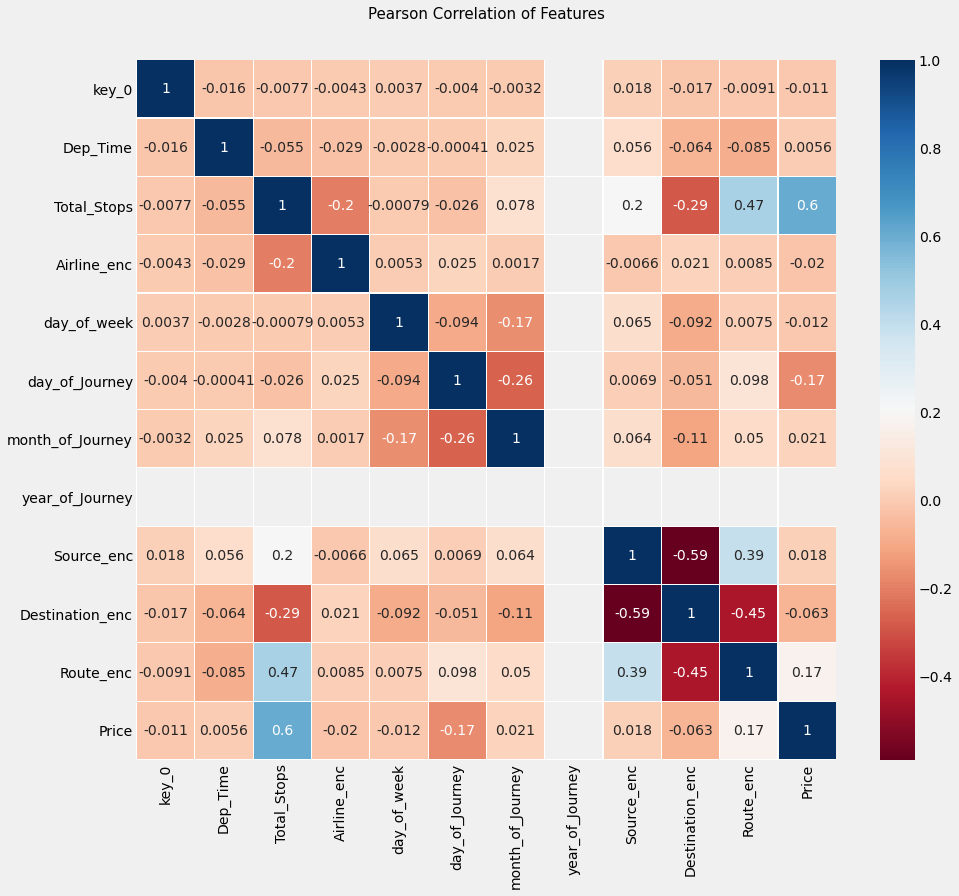

In [62]:
#Feature Selection
#corrmat = X_train.merge(y_train , on = X_train.index).corr()
# plt.subplots(figsize=(12,9))
# sns.heatmap(corrmat, vmax=0.9, square=True)


colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(X_train.merge(y_train , on = X_train.index ).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [63]:
# here you can see year of journey is a constant column hence should be dropped 

In [64]:
# also since all the columns have been converted to int/ float , you can use variance threshold -- ;-D

from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(0.8)
sel.fit(X_train)

ValueError: could not convert string to float: '01:10 22 Mar'

In [65]:
sel.variances_

AttributeError: 'VarianceThreshold' object has no attribute 'variances_'

In [66]:
X_train,X_val ,X_test = thanos_snap(['year_of_Journey'])
status_check()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7477 entries, 0 to 7476
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Dep_Time          7477 non-null   int32 
 1   Arrival_Time      7477 non-null   object
 2   Duration          7477 non-null   object
 3   Total_Stops       7477 non-null   int32 
 4   Additional_Info   7477 non-null   object
 5   Airline_enc       7477 non-null   int32 
 6   day_of_week       7477 non-null   int64 
 7   day_of_Journey    7477 non-null   int64 
 8   month_of_Journey  7477 non-null   int64 
 9   Source_enc        7477 non-null   int32 
 10  Destination_enc   7477 non-null   int32 
 11  Route_enc         7477 non-null   int32 
dtypes: int32(6), int64(3), object(3)
memory usage: 584.1+ KB
None
****************************
(7477, 12) (1602, 12) (1603, 12)
************Train Null Count****************
Dep_Time            0
Arrival_Time        0
Duration            0
Total_Sto

E:\Anaconda\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


# Modelling


# Create A Base Model

In [95]:
from sklearn.linear_model import LinearRegression
base_model = LinearRegression()
base_model.fit(X_train, y_train)

In [96]:
y_predict = base_model.predict(X_val)

In [97]:
mean_squared_error(y_val, y_predict2, squared=False)

# Once you think you have good enough result do a prediction on the X_test set just to confirm that the model is not getting overfitted

In [98]:
y_predict_test = regressor.predict(X_test)
mean_squared_error(y_test, y_predict_test, squared=False)

# The Lost Data


so in this point we have :

1-A model i.e regressor


2-main_test


3-some encoders to map i.e airline_enc etc


we have to predict the price using the model and fill it up in the price column

In [71]:
# see again price is all nan
main_test

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


we have to bring the main_test in same format as that of the X_train


Do same preprocessing steps


Do same feature engg


Do same feature selection


fed to model and predict


why no EDA ? -- Because EDA is done only on the train set

# Preprocessing 

# Null / constant / duplicate drop same steps

In [72]:
main_test.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

Drop price column as we are going to predict that + its null

In [80]:
X_main_test = main_test.drop(['Price'],axis=1)
X_main_test

# ALSO LETS DROP PRICE FROM MAIN TEST ITSELF
main_test.drop(['Price'], inplace =True,axis=1)

In [81]:
X_main_test['Date_of_Journey'] = pd.to_datetime(X_main_test['Date_of_Journey'])

In [82]:
#Feature Engg

##Remember exactly same set of feature even the column name should be same 

In [84]:
# Again new classed are there in the main_test set
temp = set(X_main_test['Airline'])-set(Airline_encoder.classes_)
for items in temp:
    Airline_encoder.classes_= np.append(Airline_encoder.classes_,items)

X_main_test['Airline_enc'] = Airline_encoder.transform(X_main_test['Airline'])

In [85]:
X_main_test['day_of_week'] = X_main_test['Date_of_Journey'].dt.weekday 
X_main_test['day_of_Journey'] = X_main_test['Date_of_Journey'].dt.day
X_main_test['month_of_Journey'] = X_main_test['Date_of_Journey'].dt.month
X_main_test['year_of_Journey'] = X_main_test['Date_of_Journey'].dt.year
X_main_test['Source_enc'] = source_encoder.transform(X_main_test['Source'])
X_main_test['Destination_enc'] = destination_encoder.transform(X_main_test['Destination'])
temp2 = set(X_main_test['Route'])-set(route_encoder.classes_)
for items in temp2:
    route_encoder.classes_= np.append(route_encoder.classes_,items)
    
X_main_test['Route_enc'] = route_encoder.transform(X_main_test['Route'])
X_main_test['Dep_Time'] = X_main_test['Dep_Time'].str.replace(':',"").astype(int)
X_main_test["Total_Stops"] = X_main_test["Total_Stops"].str.replace("non-","0 ").str.split(" ").str[0].astype(int)
X_main_test.info()

In [86]:
# Deleteing the object/datetime counter parts

X_main_test.drop(['Airline','Date_of_Journey','Source','Destination','Route'],inplace =True ,axis=1)

In [87]:
X_main_test.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info'],
      dtype='object')

In [88]:
X_train.columns

Index(['Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Airline_enc', 'day_of_week', 'day_of_Journey',
       'month_of_Journey', 'Source_enc', 'Destination_enc', 'Route_enc'],
      dtype='object')

In [90]:
# remove year_of_journey 

X_main_test.drop(['year_of_Journey'],inplace =True ,axis=1)

In [91]:
# PREDICT IT 

final_result = regressor.predict(X_main_test)

In [92]:
final_result = pd.Series(final_result,name='Price')

In [93]:
# resetting the index of main test so that we can merge price series with it
main_test.reset_index(drop=True,inplace=True)

In [94]:
Final = main_test.merge(final_result , on = X_main_test.index )
Final 